# Exercise Sheet 1



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('covertype.csv')
print(df.columns)


df = df.set_index('Id')
x = df.copy()
del x['Cover_Type']

y = df.Cover_Type

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1337)

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

### Train a simple deep neural network
- Use Keras to define a simple Multi-Layer Perceptron with at least 3 layers and a Softmax classifier
    - You have to explicitly give the input shape of the first layer
    - The other layer shapes are inferred
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Define 'accuracy' as performance metric when compiling the network model
- Train the MLP with x_train, y_train
    - Make sure to save the training history for later assessment
- Evaluate the performance on x_test, y_test

In [2]:
import keras


number_of_classes = len(y.unique())

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(number_of_classes, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_data=(x_test, y_test)
    )

Using TensorFlow backend.


Train on 10584 samples, validate on 4536 samples
Epoch 1/10
10584/10584 [==============================] - 1s 89us/step - loss: nan - acc: 0.1454 - val_loss: nan - val_acc: 0.1347
Epoch 2/10
10584/10584 [==============================] - 0s 27us/step - loss: nan - acc: 0.1464 - val_loss: nan - val_acc: 0.1347
Epoch 3/10
10584/10584 [==============================] - 0s 27us/step - loss: nan - acc: 0.1464 - val_loss: nan - val_acc: 0.1347
Epoch 4/10
10584/10584 [==============================] - 0s 27us/step - loss: nan - acc: 0.1464 - val_loss: nan - val_acc: 0.1347
Epoch 5/10
10584/10584 [==============================] - 0s 27us/step - loss: nan - acc: 0.1464 - val_loss: nan - val_acc: 0.1347
Epoch 6/10
10584/10584 [==============================] - 0s 27us/step - loss: nan - acc: 0.1464 - val_loss: nan - val_acc: 0.1347
Epoch 7/10
10584/10584 [==============================] - 0s 26us/step - loss: nan - acc: 0.1464 - val_loss: nan - val_acc: 0.1347
Epoch 8/10
10584/10584 [==========

### Debug
- If your loss is NaN, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [36]:
import numpy as np


print(np.isfinite(x.values).all())
print(np.isfinite(y.values).all())

print(sorted(y.unique()))

y = y - 1

print(sorted(y.unique()))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1337)

True
True
[1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]


### Train again
- Reinitialize or redefine your MLP from above and train it again

In [4]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(number_of_classes, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_data=(x_test, y_test)
    )

Train on 10584 samples, validate on 4536 samples
Epoch 1/10
10584/10584 [==============================] - 0s 46us/step - loss: 13.7497 - acc: 0.1469 - val_loss: 13.9470 - val_acc: 0.1347
Epoch 2/10
10584/10584 [==============================] - 0s 26us/step - loss: 13.7592 - acc: 0.1464 - val_loss: 13.9470 - val_acc: 0.1347
Epoch 3/10
10584/10584 [==============================] - 0s 27us/step - loss: 13.7592 - acc: 0.1464 - val_loss: 13.9470 - val_acc: 0.1347
Epoch 4/10
10584/10584 [==============================] - 0s 26us/step - loss: 13.7592 - acc: 0.1464 - val_loss: 13.9470 - val_acc: 0.1347
Epoch 5/10
10584/10584 [==============================] - 0s 27us/step - loss: 13.7592 - acc: 0.1464 - val_loss: 13.9470 - val_acc: 0.1347
Epoch 6/10
10584/10584 [==============================] - 0s 26us/step - loss: 13.7592 - acc: 0.1464 - val_loss: 13.9470 - val_acc: 0.1347
Epoch 7/10
10584/10584 [==============================] - 0s 26us/step - loss: 13.7592 - acc: 0.1464 - val_loss: 13.9

### Does it work?
- The loss should now be a number.
- Does the network converge?



### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [40]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format



stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

for col in x.columns:
    stats.loc[col] = {"Type": x[col].dtype,
                      "Min": np.min(x[col]),
                      "Max": np.max(x[col]),
                      "Mean": np.mean(x[col]),
                      "Std": np.std(x[col])
                     }

display(stats)

,Type,Min,Max,Mean,Std
Elevation,float64,-2.12,2.63,0.00,1.00
Aspect,float64,-1.43,1.84,-0.01,1.00
Slope,float64,-1.95,4.23,0.01,1.01
Horizontal_Distance_To_Hydrology,float64,-1.08,5.31,0.00,1.00
Vertical_Distance_To_Hydrology,float64,-3.24,8.29,0.01,1.01
Horizontal_Distance_To_Roadways,float64,-1.29,3.87,-0.01,0.99
Hillshade_9am,float64,-6.92,1.35,0.01,1.00
Hillshade_Noon,float64,-5.34,1.54,-0.02,1.01
Hillshade_3pm,float64,-2.98,2.47,-0.01,1.01
Horizontal_Distance_To_Fire_Points,float64,-1.38,5.02,0.00,1.01


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [38]:
from sklearn import preprocessing


# Wilderness_Area* and Soil_Type* are binary attributes. Do not preprocess them.
scaled_columns = x.columns[:10]


# Split data with given random_state to be able to remember the splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1337)


# Get transformation parameters from training data
std_scale = preprocessing.StandardScaler().fit(x_train[scaled_columns])

# Transform all data with computed parameters 
x.loc[:, scaled_columns] = std_scale.transform(x.loc[:, scaled_columns])


# Split preprocessed data again with given random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1337)

### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [39]:
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

for col in x.columns:
    stats.loc[col] = {"Type": x[col].dtype,
                      "Min": np.min(x[col]),
                      "Max": np.max(x[col]),
                      "Mean": np.mean(x[col]),
                      "Std": np.std(x[col])
                     }

display(stats)

,Type,Min,Max,Mean,Std
Elevation,float64,-2.12,2.63,0.00,1.00
Aspect,float64,-1.43,1.84,-0.01,1.00
Slope,float64,-1.95,4.23,0.01,1.01
Horizontal_Distance_To_Hydrology,float64,-1.08,5.31,0.00,1.00
Vertical_Distance_To_Hydrology,float64,-3.24,8.29,0.01,1.01
Horizontal_Distance_To_Roadways,float64,-1.29,3.87,-0.01,0.99
Hillshade_9am,float64,-6.92,1.35,0.01,1.00
Hillshade_Noon,float64,-5.34,1.54,-0.02,1.01
Hillshade_3pm,float64,-2.98,2.47,-0.01,1.01
Horizontal_Distance_To_Fire_Points,float64,-1.38,5.02,0.00,1.01


### Train the network again
- Reinitialize or redefine your MLP from above and train it again


In [8]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(number_of_classes, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=100, batch_size=64,
    validation_data=(x_test, y_test)
    )


Train on 10584 samples, validate on 4536 samples
Epoch 1/100
10584/10584 [==============================] - 1s 48us/step - loss: 0.9529 - acc: 0.6309 - val_loss: 0.6875 - val_acc: 0.7156
Epoch 2/100
10584/10584 [==============================] - 0s 30us/step - loss: 0.6508 - acc: 0.7314 - val_loss: 0.6287 - val_acc: 0.7343
Epoch 3/100
10584/10584 [==============================] - 0s 26us/step - loss: 0.5915 - acc: 0.7560 - val_loss: 0.6142 - val_acc: 0.7352
Epoch 4/100
10584/10584 [==============================] - 0s 27us/step - loss: 0.5567 - acc: 0.7677 - val_loss: 0.5692 - val_acc: 0.7601
Epoch 5/100
10584/10584 [==============================] - 0s 27us/step - loss: 0.5269 - acc: 0.7826 - val_loss: 0.5729 - val_acc: 0.7586
Epoch 6/100
10584/10584 [==============================] - 0s 26us/step - loss: 0.5052 - acc: 0.7875 - val_loss: 0.5483 - val_acc: 0.7729
Epoch 7/100
10584/10584 [==============================] - 0s 27us/step - loss: 0.4899 - acc: 0.7961 - val_loss: 0.5309 - v

### Visualize the training
- use matplotlib.pyplot to visualize the keras history
- plot both the training accuracy and the validation accuracy

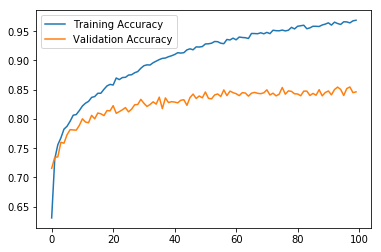

In [10]:
import matplotlib.pyplot as plt


plt.plot(history.epoch, history.history["acc"], label="Training Accuracy")
plt.plot(history.epoch, history.history["val_acc"], label="Validation Accuracy")

plt.legend()
plt.show()